# Imports 

In [12]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

from IPython.core.display import display

#Constants


In [5]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Pre-processing Images



In [22]:
pic = load_img(FILE_1, target_size=(299, 299))

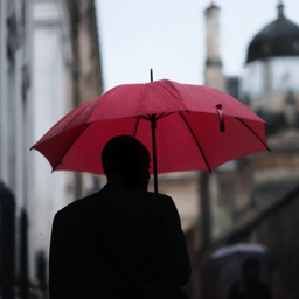

In [23]:
display(pic)

In [24]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [25]:
expanded = np.expand_dims(pic_array, axis = 0)
expanded.shape
#The input of the model requires an array with this shape

(1, 299, 299, 3)

In [26]:
preprocessed = preprocess_input(expanded)
#processing for the model

# Load InceptionResNet

In [27]:
%%time
inception_model = InceptionResNetV2(weights = 'imagenet')

CPU times: user 7.41 s, sys: 480 ms, total: 7.89 s
Wall time: 7.44 s


In [28]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions


In [30]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

49152/35363 [=========================================] - 0s 0us/step


[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062961),
  ('n03788195', 'mosque', 0.0010572354),
  ('n03220513', 'dome', 0.0010310997)]]

# Create a function that does all this:

In [32]:
def format_img_inceptionresnet( filename):
  pic = load_img(filename, target_size= (299, 299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis = 0)
  preprocessed = preprocess_input(expanded)
  prediction = inception_model.predict(preprocessed)
  a = decode_predictions(prediction)
  b = display(pic)

  return a, b
  

#Think how to print pic along with it

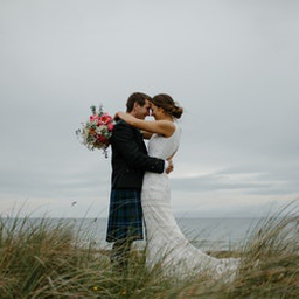

([[('n10148035', 'groom', 0.7042387),
   ('n03450230', 'gown', 0.116695516),
   ('n11879895', 'rapeseed', 0.016582701),
   ('n09421951', 'sandbar', 0.0127906585),
   ('n03534580', 'hoopskirt', 0.007287779)]],
 None)

In [33]:
format_img_inceptionresnet(FILE_2)

In [36]:
vgg19_model = VGG19()

574726144/574710816 [==============================] - 4s 0us/step


In [37]:
def abcd( File):
  pic = load_img(File, target_size= (224, 224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis = 0)
  preprocessed = preprocess_input_vgg19(expanded)
  prediction = vgg19_model.predict(preprocessed)
  a = decode_vgg19(prediction)
  b = display(pic)

  return a, b

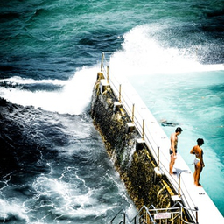

([[('n04347754', 'submarine', 0.16831146),
   ('n02894605', 'breakwater', 0.12554656),
   ('n03662601', 'lifeboat', 0.09670136),
   ('n09399592', 'promontory', 0.084240325),
   ('n02981792', 'catamaran', 0.08419342)]],
 None)

In [38]:
abcd(FILE_3)